In [1]:
from helper import *


In [ ]:
Nr = 30
Nc = 30
N = Nr*Nc

J2_list = np.array([0.])
l_list = np.array([0.9, 0.95])
T_list = np.array([15, 12, 10, 8, 6, 5, 4, 3, 2, 1, 0.5])

h = 0.

Nwarmup = 10*N
Ncycle = 1000
Lcycle = 5*N

for l in l_list:
    run_script(Nr, Nc, J2_list, T_list, h, l, Nwarmup, Ncycle, Lcycle, tag='rkky_conductivity_Nc%i'%(Ncycle), meas_config=False, meas_M=False, meas_E=False, meas_S=True, meas_SEm=False)


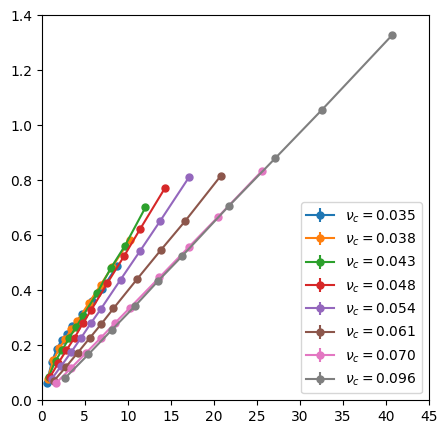

In [4]:
l_list = np.flip([0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])

fig, ax = plt.subplots(1, 1, figsize=(5,5))

for l in l_list: 
    with h5py.File('data/rkky_conductivity_Nc1000-l%.2f-J20.00-h0.00-N900.h5'%(l), 'r') as f:
        T_list = np.array(f['T_list'], dtype=float)
        S_array = np.array(f['S_array'])

    Nc = len(S_array[0,0])
    
    R_list = 1./np.mean(S_array[:-1,0,], axis=1)
    Rerr_list = np.std(S_array[:-1,0,], axis=1)*R_list**2/np.sqrt(Nc)
    
    nu = 0.138/(2*l)**2
    ax.errorbar(T_list[:-1]*(91.4*nu**1.5), R_list*(233*nu**3), yerr=Rerr_list*(nu**3), marker='.',markersize=10,label='$\\nu_c=$%.3f'%(nu))
    
ax.set_ybound(lower=0, upper=1.4)
ax.set_xbound(lower=0, upper=45)
ax.legend()

fig.savefig('figures/rkky_resistivity_absolute.pdf',dpi=300,bbox_inches="tight")

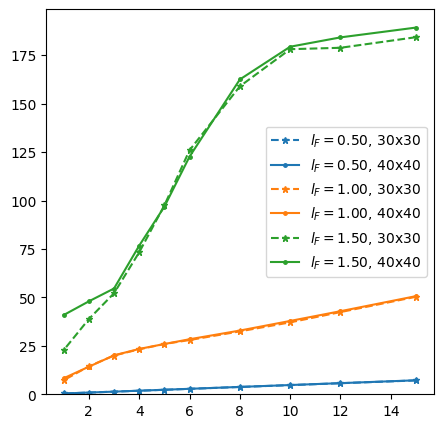

In [4]:
l_list = [0.5, 1.0, 1.5]

fig, ax = plt.subplots(1, 1, figsize=(5,5))

for i in range(len(l_list)):
    l = l_list[i]
    with h5py.File('data/rkky_conductivity_Nc2000-l%.2f-J20.00-h0.00-N900.h5'%(l), 'r') as f:
        T_list = np.array(f['T_list'], dtype=float)
        S_array = np.array(f['S_array'])

    
    ax.plot(T_list, 1./np.mean(S_array[:,0,:], axis=1), color=colors[i], linestyle='--', marker='*',markersize=5,label='$l_F=$%.2f, 30x30'%(l))
    
    with h5py.File('data/rkky_conductivity_Nc2000-l%.2f-J20.00-h0.00-N1600.h5'%(l), 'r') as f:
        T_list = np.array(f['T_list'], dtype=float)
        S_array = np.array(f['S_array'])

    
    ax.plot(T_list, 1./np.mean(S_array[:,0,:], axis=1), color=colors[i], marker='.',markersize=5,label='$l_F=$%.2f, 40x40'%(l))

ax.set_ybound(lower=0)
ax.legend()

# fig.savefig('figures/rkky_resistivity_finite_size.pdf',dpi=300,bbox_inches="tight")